In [2]:
%matplotlib inline
import os
import ElementsEnv

%erun SourceXtractorTools 0.1
import matplotlib.pyplot as plt
from Profiling import PlotRunProfile

In [3]:
def parse_logs(name, path='/home/aalvarez/Work/Data/SX/problem382/'):
    log = PlotRunProfile.read_sourcex_logs(os.path.join(path, f'sx_{name}.log'))
    pidstat = PlotRunProfile.read_pidstat(os.path.join(path, f'sx_{name}.pidstat'))
    return log, pidstat

In [ ]:
devel_log, devel_pidstat = parse_logs('develop')

WARN    : not enough values to unpack (expected 5, got 0)
2021-09-23T09:20:35CEST Profiling.PlotRunProfile  WARN : not enough values to unpack (expected 5, got 0)


In [5]:
throttle_log, throttle_pidstat = parse_logs('throttle')

WARN    : not enough values to unpack (expected 5, got 0)
2021-09-23T09:20:39CEST Profiling.PlotRunProfile  WARN : not enough values to unpack (expected 5, got 0)


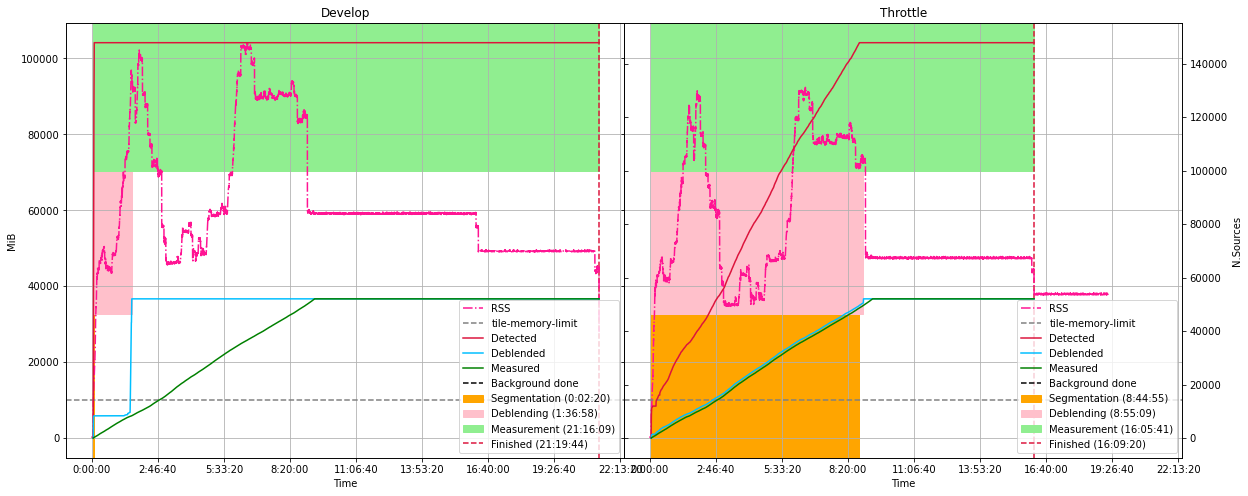

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.subplots_adjust(wspace=0)

PlotRunProfile.plot_perf(devel_pidstat, devel_log, ax=axes[0], y_left='memory', y_right='sources')
axes[0].set_title('Develop')

PlotRunProfile.plot_perf(throttle_pidstat, throttle_log, ax=axes[1], y_left='memory', y_right='sources')
axes[1].set_title('Throttle')

axes[1].sharex(axes[0])
axes[1].sharey(axes[0])
plt.setp(axes[1].get_yticklabels(), visible=False)
plt.setp(axes[1].get_yaxis().get_label(), visible=False)

ax0_mem = axes[0]._twinned_axes.get_siblings(axes[0])[1]
ax0_mem.sharey(axes[0]._twinned_axes.get_siblings(axes[1])[1])
plt.setp(ax0_mem.get_yticklabels(), visible=False)
plt.setp(ax0_mem.get_yaxis().get_label(), visible=False)

plt.show()

In [8]:
fig.savefig('/home/aalvarez/Downloads/throttle.png', bbox_inches='tight')